# Multiple Linear Regression

## Theory

* **Multiple Linear RegressionThe main objective is to find the linear function that expresses the relationship between dependent and independent variables.**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

housePrice = pd.read_csv("house_price_dataset.csv")
df = housePrice.copy()
df

,HouseSize,Rooms,Price
0,83,10,248218.31
1,229,7,381317.37
2,272,10,466820.88
3,187,5,320928.25
4,299,3,388367.41
...,...,...,...
145,106,1,158088.76
146,88,3,180259.56
147,158,4,274081.14
148,230,1,312092.92


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   HouseSize  150 non-null    int64  
 1   Rooms      150 non-null    int64  
 2   Price      150 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 3.6 KB


In [3]:
df.isnull().values.any()

False

In [4]:
df.dtypes

HouseSize      int64
Rooms          int64
Price        float64
dtype: object

In [5]:
df.shape

(150, 3)

In [6]:
df.size

450

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
HouseSize,150.0,177.613333,72.752203,50.0,119.2500,181.50,235.7500,299.00
Rooms,150.0,5.413333,2.976838,1.0,3.0000,5.00,8.0000,10.00
Price,150.0,310581.277867,86387.330712,130520.3,262135.4975,313094.07,373724.4425,502252.12


In [8]:
df.corr()

,HouseSize,Rooms,Price
HouseSize,1.000000,0.024109,0.849300
Rooms,0.024109,1.000000,0.532038
Price,0.849300,0.532038,1.000000


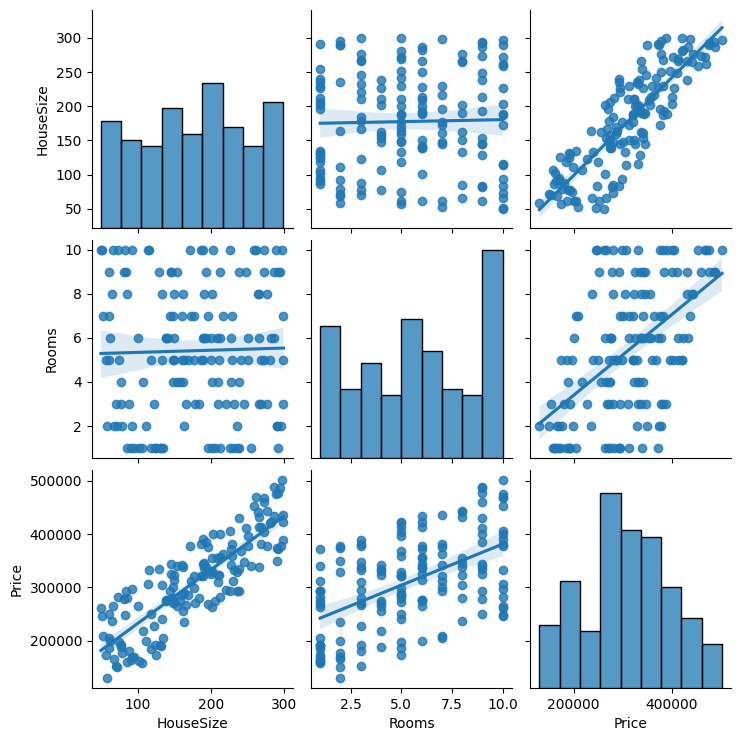

In [9]:
sns.pairplot(df, kind="reg");

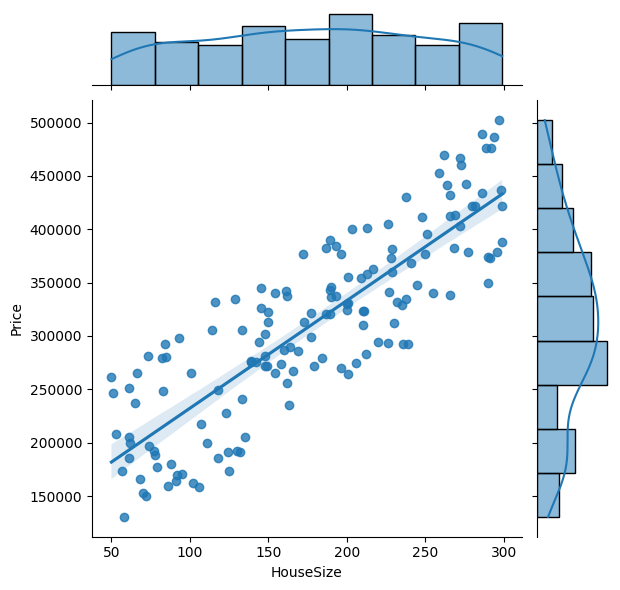

In [10]:
sns.jointplot(x = "HouseSize", y = "Price", kind="reg", data=df);

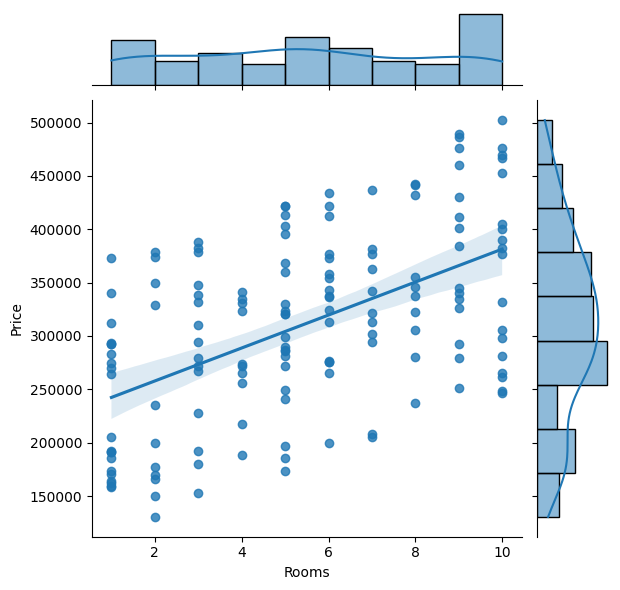

In [11]:
sns.jointplot(x = "Rooms", y = "Price", kind="reg", data=df);

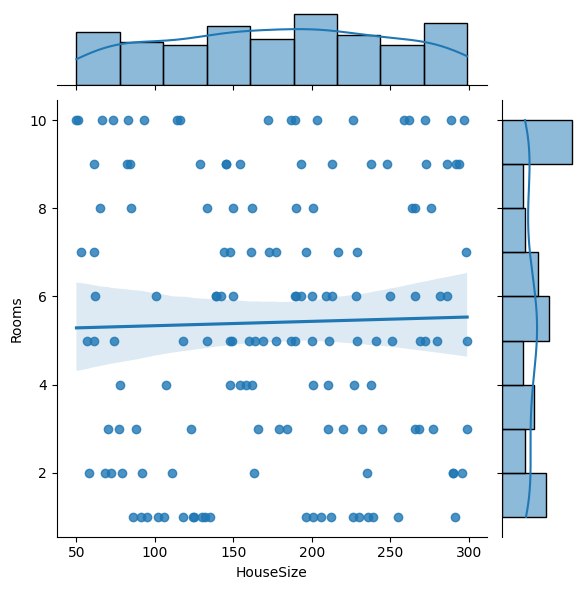

In [13]:
sns.jointplot(x = "HouseSize", y = "Rooms", kind="reg", data=df);

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [12]:
X = df.drop("Price", axis = 1)
X[0:5]

,HouseSize,Rooms
0,83,10
1,229,7
2,272,10
3,187,5
4,299,3


In [14]:
y = df["Price"]
y[0:5]

0    248218.31
1    381317.37
2    466820.88
3    320928.25
4    388367.41
Name: Price, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
X_train[0:5]

,HouseSize,Rooms
22,268,3
15,129,9
65,107,4
11,286,6
42,93,10


In [18]:
y_train[0:5]

22    382059.07
15    334524.53
65    217690.06
11    434026.52
42    297677.80
Name: Price, dtype: float64

In [19]:
X_test[0:5]

,HouseSize,Rooms
73,266,6
18,290,2
118,238,9
78,150,8
76,213,9


In [20]:
y_test[0:5]

73     412510.65
18     349707.69
118    430642.52
78     322599.21
76     400936.66
Name: Price, dtype: float64

In [21]:
X_train.shape

(120, 2)

In [22]:
y_train.shape

(120,)

In [23]:
X_test.shape

(30, 2)

In [24]:
y_test.shape

(30,)

In [25]:
training = df.copy()

In [27]:
training.shape

(150, 3)

## Statsmodels

In [28]:
lm = sm.OLS(y_train, X_train)

In [29]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                          1.401e+04
Date:                Fri, 13 Dec 2024   Prob (F-statistic):                   5.47e-141
Time:                        23:19:50   Log-Likelihood:                         -1362.4
No. Observations:                 120   AIC:                                      2729.
Df Residuals:                     118   BIC:                                      2734.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
HouseSize   1181.7622     16.967     69.650      0.000    1148.163    1215.362
Rooms       1.767e+04    526.985     33.525      0.000    1.66e+04    1.87e+04
==============================================================================
Omnibus:                        2.391   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                2.352
Skew:                          -0.283   Prob(JB):                        0.308
Kurtosis:                       2.614   Cond. No.                         52.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
HouseSize,1181.7622,16.967,69.650,0.000,1148.163,1215.362
Rooms,1.767e+04,526.985,33.525,0.000,1.66e+04,1.87e+04


In [33]:
model.params

HouseSize     1181.762246
Rooms        17667.375570
dtype: float64

In [36]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)

## Model Prediction

### Model Equation

In [37]:
model.intercept_

54929.12156965479

In [38]:
model.coef_

array([  993.14010687, 14593.28395529])

**Price = 54929.12156965479 + HouseSize993.14010687 + Rooms14593.28395529**

How much is a 150 square metre, 8-room house?

In [42]:
new_data = [[150],[8]]
new_data = pd.DataFrame(new_data).T

In [43]:
new_data

,0,1
0,150,8


In [44]:
model.predict(new_data)

C:\Users\hp\anaconda3\envs\webscraping\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([320646.40924285])

## Error Investigation

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

### training error

In [50]:
rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

In [51]:
rmse

11208.460671376513

### test error

In [52]:
rmse2 = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

In [53]:
rmse2

11182.04120120977

## Model Tuning

In [54]:
X = df.drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_tarin, y_test = train_test_split(X, y,
                                                   test_size=0.20,
                                                   random_state=42)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [55]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

11208.460671376513

In [56]:
model.score(X_train, y_train)

0.9824185918290691

In [57]:
X = df.drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_tarin, y_test = train_test_split(X, y,
                                                   test_size=0.20,
                                                   random_state=99)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [58]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

81867.92005198722

In [59]:
model.score(X_train, y_train)

0.062029400673047186

In [60]:
X = df.drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_tarin, y_test = train_test_split(X, y,
                                                   test_size=0.20,
                                                   random_state=10)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [61]:
np.sqrt(mean_squared_error(y_train, model.predict(X_train)))

84066.45664181974

In [62]:
model.score(X_train, y_train)

0.010975165061089642

**validated r-squared value**

In [70]:
X = df.drop("Price", axis=1)
y = df["Price"]
X_train, X_test, y_tarin, y_test = train_test_split(X, y,
                                                   test_size=0.20,
                                                   random_state=42)
lm = LinearRegression()
model = lm.fit(X_train, y_train)

In [71]:
cross_val_score(model, X, y, cv = 10, scoring="r2")

array([0.98014696, 0.93005846, 0.96202167, 0.98770373, 0.99137306,
       0.94217081, 0.97878696, 0.98527941, 0.97827503, 0.99355212])

In [72]:
cross_val_score(model, X, y, cv = 10, scoring="r2").mean()

0.9729368212948662

In [73]:
cross_val_score(model, X_train, y_train, cv = 10, scoring="r2").mean()

0.9793374630430869

**rmse**

In [74]:
-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring="neg_mean_squared_error")

array([1.44795007e+08, 2.39462158e+08, 1.50499607e+08, 1.79652906e+08,
       1.65329015e+08, 1.10446859e+08, 5.18422773e+07, 1.03417230e+08,
       5.88050867e+07, 1.10198439e+08])

In [75]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring="neg_mean_squared_error"))

array([12033.07968346, 15474.5648806 , 12267.82813132, 13403.46618963,
       12858.03310254, 10509.37004488,  7200.15814331, 10169.42621678,
        7668.44747716, 10497.54442524])

In [76]:
np.sqrt(-cross_val_score(model, 
                X_train, 
                y_train, 
                cv = 10, 
                scoring="neg_mean_squared_error")).mean()

11208.191829491552

In [77]:
np.sqrt(mean_squared_error(y_test, model.predict(X_test)))

11182.04120120977

In [79]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring="neg_mean_squared_error"))

array([12309.35647473,  9011.10067946, 12747.41544035,  8764.74797656,
       12759.17346595, 15875.41588935,  7279.31594074, 15067.746084  ,
       15108.57430617,  3332.0297246 ])

In [80]:
np.sqrt(-cross_val_score(model, 
                X_test, 
                y_test, 
                cv = 10, 
                scoring="neg_mean_squared_error")).mean()

11225.487598191507